# VALIDATE data engineering work

Most work can be done using pandas/scipy/numpy and other Python data science tools, installed on this Docker instance.

In [1]:
import pandas as pd
import geopandas as gpd
import ipyleaflet as ipyl
import ipywidgets as ipyw
import json
%matplotlib inline

### Import cardiac care dataset as `pandas` DataFrame for manipulation

In [2]:
validate_df = pd.read_csv('../data/cardiac/cardiac_care_anonymous.csv', encoding="ISO-8859-1")
validate_df

,Random ID,Created Year,Age,Gender,Status,Surgery Admission Date,Surgery Discharge Date,Days in Hospital for Surgery,First Admission Without Surgery?,Admission Date,...,Emergency Case,Ventilator dependent,Disseminated cancer,Steroid use for chronic condition,Ascites within 30 days prior to surgery,Current smoker within 1 year,History of severe COPD,Acute Renal Failure,Systemic sepsis within 48 hours prior to surgery,Hospitalized previously
0,2863,2017,17,Female,Local Managed Care,48,55.0,7,8000,8000,...,999,999,999,999,999,999,999,999,999,999
1,3724,2017,70,Male,In Care of Provider,8000,8000.0,8000,999,2,...,999,999,999,999,999,999,999,999,999,999
2,6862,2016,36,Female,Local Managed Care,-31,-16.0,15,999,-7,...,999,999,999,999,999,999,999,999,999,999
3,539,2017,4,Male,Local Managed Care,76,82.0,6,8000,8000,...,999,999,999,999,999,999,999,999,999,999
4,3947,2017,72,Male,Local Managed Care,8000,8000.0,8000,999,-1,...,999,999,999,999,999,999,999,999,999,999
5,2724,2017,8,Female,In Care of Provider,8000,8000.0,8000,999,40,...,999,999,999,999,999,999,999,999,999,999
6,5921,2017,1,Female,Local Managed Care,-10,-7.0,3,8000,8000,...,999,999,999,999,999,999,999,999,999,999
7,1831,2017,59,Male,Awaiting Admission,8000,8000.0,8000,8000,8000,...,999,999,999,999,999,999,999,999,999,999
8,6655,2017,48,Female,Local Managed Care,19,25.0,6,8000,8000,...,999,999,999,999,999,999,999,999,999,999
9,6456,2017,57,Female,In Care of Provider,8000,8000.0,8000,999,27,...,999,999,999,999,999,999,999,999,999,999


### Basic query for per-hospital attributes

In [3]:
validate_df.groupby(['Hospital', 'Surgery County', 'Gender'])['Random ID'].count()

Hospital          Surgery County  Gender
HOSP_EIGHT        Nairobi         Female      1
                                  Male        2
HOSP_FIVE         Nairobi         Female     40
                                  Male       39
HOSP_FOUR         Nairobi         Female    139
                                  Male      104
HOSP_NINE         Nairobi         Female      1
                                  Male        1
HOSP_ONE          Bomet           Female     59
                                  Male       40
HOSP_SEVEN        Mombasa         Female      5
                                  Male        2
HOSP_SIX          Uasin Gishu     Female      9
                                  Male        7
HOSP_THREE        Nairobi         Female     15
                                  Male       13
HOSP_TWO          Nairobi         Female     93
                                  Male       47
MP Shah Hospital  Nairobi         Male        1
Name: Random ID, dtype: int64

### Hospital counts per county

The following creates a new dataframe where the hospitals in each `Surgery County` (hospital location) are counted. We will use this for aggregations across geographic layers.

In [4]:
hosp_df = validate_df.groupby(['Surgery County'])['Hospital'].nunique().reset_index()
hosp_df

,Surgery County,Hospital
0,Bomet,1
1,Kisumu,1
2,Mombasa,1
3,Nairobi,7
4,Uasin Gishu,1


### Create geojson file with number of hospitals per region

In [5]:
ken_gdf = gpd.read_file('../data/geodata/kenya_adm1.geojson')

In [6]:
# rename column for geopandas merge
hdf = hosp_df.rename(columns={'Surgery County':'NAME_1'})

# merge hospitals dataframe into kenya ADM1 (counties) geodataframe
ken_gdf = ken_gdf.merge(hdf, on='NAME_1')

# remove some unnecessary headers
ken_gdf = ken_gdf.drop(['CCA_1', 'CCN_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1'], axis=1)

# display geopandas dataframe with added hospital count attribute
ken_gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,TYPE_1,geometry,Hospital
0,118,KEN,Kenya,2,Bomet,KE.BO,County,(POLYGON ((35.47388458251964 -0.39523547887790...,1
1,118,KEN,Kenya,17,Kisumu,KE.KU,County,(POLYGON ((34.82119369506842 0.015963643789348...,1
2,118,KEN,Kenya,28,Mombasa,KE.MM,County,(POLYGON ((39.63847351074219 -4.05097293853754...,1
3,118,KEN,Kenya,30,Nairobi,KE.NB,County,(POLYGON ((36.90256881713896 -1.15791022777557...,7
4,118,KEN,Kenya,44,Uasin Gishu,KE.UG,County,(POLYGON ((35.42059707641596 0.943528115749416...,1


#### write to `geojson`

In [7]:
# ken_gdf.to_file('data/vd_counties.geojson', driver="GeoJSON")

### Create a Leaflet map showing counties with hospitals (WIP)

In [8]:
with open('../data/geodata/vd_counties.geojson') as f:
    data = json.load(f)

In [9]:
m = ipyl.Map(center=[1, 38], zoom=6)
label = ipyw.Label(layout=ipyw.Layout(width='100%'))

for feature in data['features']:
    feature['properties']['style'] = {
        'color': 'grey',
        'weight': 1,
        'fillColor': 'grey',
        'fillOpacity': 0.5
    }
layer = ipyl.GeoJSON(data=data, hover_style={'fillColor': 'red'})

def hover_handler(event=None, id=None, properties=None):
    label.value = properties['NAME_1']

In [10]:
layer.on_hover(hover_handler)
m.add_layer(layer)

In [11]:
ipyw.VBox([m, label])

Widget Javascript not detected.  It may not be installed or enabled properly.


### Other descriptive statistics (WIP)

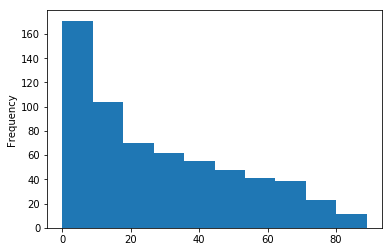

In [12]:
validate_df['Age'].plot.hist()

#### Print column header names

In [13]:
validate_df.columns

Index(['Random ID', 'Created Year', 'Age', 'Gender', 'Status',
       'Surgery Admission Date', 'Surgery Discharge Date',
       'Days in Hospital for Surgery', 'First Admission Without Surgery?',
       'Admission Date', 'Discharge Date', 'Days in Hospital',
       'Other Admission Date', 'Other Discharge Date',
       'Other Days in Hospital', 'Other Admission Date.1',
       'Other Discharge Date.1', 'Other Days in Hospital.1',
       'Number of Total Hospital Admittances', 'Number of Re-admittances',
       'Diagnosis', 'ICD 10', 'Category', 'Procedure', 'Risk of Complication',
       'Risk of Infection', 'Pre-assessment Date',
       'Original Scheduled Date for Surgery', 'Days from Created to Surgery',
       'Number of scheduled surgeries', 'Brand', 'Device',
       'Surgery Start Date', 'Surgery End Date', 'Hours in Surgery',
       'Asa Class', 'Operating Surgeon', 'Assistant Surgeon', 'Cardiologist',
       'Perfusionist', 'Anesthetist', 'Type Surgery', 'Is Open Heart',
     